In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [19]:
np.array(range(0,100))/100 # Timeseries

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [3]:
Data = [[[(i+j)/100] for i in range(5)] for j in range(100)]
Data[:5]

[[[0.0], [0.01], [0.02], [0.03], [0.04]],
 [[0.01], [0.02], [0.03], [0.04], [0.05]],
 [[0.02], [0.03], [0.04], [0.05], [0.06]],
 [[0.03], [0.04], [0.05], [0.06], [0.07]],
 [[0.04], [0.05], [0.06], [0.07], [0.08]]]

In [4]:
Target = [(i+5)/100 for i in range(100)]
Target[:5]

[0.05, 0.06, 0.07, 0.08, 0.09]

In [20]:
data = np.array(Data,dtype=float)
target = np.array(Target,dtype=float)

In [21]:
data.shape, target.shape

((100, 5, 1), (100,))

In [8]:
data

array([[[0.  ],
        [0.01],
        [0.02],
        [0.03],
        [0.04]],

       [[0.01],
        [0.02],
        [0.03],
        [0.04],
        [0.05]],

       [[0.02],
        [0.03],
        [0.04],
        [0.05],
        [0.06]],

       [[0.03],
        [0.04],
        [0.05],
        [0.06],
        [0.07]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.06],
        [0.07],
        [0.08],
        [0.09],
        [0.1 ]],

       [[0.07],
        [0.08],
        [0.09],
        [0.1 ],
        [0.11]],

       [[0.08],
        [0.09],
        [0.1 ],
        [0.11],
        [0.12]],

       [[0.09],
        [0.1 ],
        [0.11],
        [0.12],
        [0.13]],

       [[0.1 ],
        [0.11],
        [0.12],
        [0.13],
        [0.14]],

       [[0.11],
        [0.12],
        [0.13],
        [0.14],
        [0.15]],

       [[0.12],


In [9]:
target

array([0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26,
       0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37,
       0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48,
       0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59,
       0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 ,
       0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81,
       0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92,
       0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03,
       1.04])

In [22]:
#Dividing data into train & test
x_train, x_test, y_train, y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [23]:
x_train

array([[[0.8 ],
        [0.81],
        [0.82],
        [0.83],
        [0.84]],

       [[0.04],
        [0.05],
        [0.06],
        [0.07],
        [0.08]],

       [[0.81],
        [0.82],
        [0.83],
        [0.84],
        [0.85]],

       [[0.76],
        [0.77],
        [0.78],
        [0.79],
        [0.8 ]],

       [[0.85],
        [0.86],
        [0.87],
        [0.88],
        [0.89]],

       [[0.6 ],
        [0.61],
        [0.62],
        [0.63],
        [0.64]],

       [[0.05],
        [0.06],
        [0.07],
        [0.08],
        [0.09]],

       [[0.7 ],
        [0.71],
        [0.72],
        [0.73],
        [0.74]],

       [[0.71],
        [0.72],
        [0.73],
        [0.74],
        [0.75]],

       [[0.19],
        [0.2 ],
        [0.21],
        [0.22],
        [0.23]],

       [[0.65],
        [0.66],
        [0.67],
        [0.68],
        [0.69]],

       [[0.62],
        [0.63],
        [0.64],
        [0.65],
        [0.66]],

       [[0.27],


### RNN

In [41]:
model = Sequential() 
model.add(SimpleRNN((5),batch_input_shape=(None,5,1),return_sequences=False, activation='relu'))
model.add(Dense(1))

In [42]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_squared_error'])

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(x_train,y_train,
                      epochs=100,
                      validation_data=(x_test,y_test))

Epoch 1/100
3/3 [==============================] - 0s 64ms/step - loss: 0.2633 - mean_squared_error: 0.2633 - val_loss: 0.1819 - val_mean_squared_error: 0.1819
Epoch 2/100
3/3 [==============================] - 0s 7ms/step - loss: 0.2527 - mean_squared_error: 0.2527 - val_loss: 0.1739 - val_mean_squared_error: 0.1739
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2422 - mean_squared_error: 0.2422 - val_loss: 0.1662 - val_mean_squared_error: 0.1662
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 0.2320 - mean_squared_error: 0.2320 - val_loss: 0.1587 - val_mean_squared_error: 0.1587
Epoch 5/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2224 - mean_squared_error: 0.2224 - val_loss: 0.1514 - val_mean_squared_error: 0.1514
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 0.1443 - val_mean_squared_error: 0.1443
Epoch 7/100
3/3 [============================

3/3 [==============================] - 0s 9ms/step - loss: 0.0135 - mean_squared_error: 0.0135 - val_loss: 0.0168 - val_mean_squared_error: 0.0168
Epoch 53/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0133 - mean_squared_error: 0.0133 - val_loss: 0.0165 - val_mean_squared_error: 0.0165
Epoch 54/100
3/3 [==============================] - 0s 9ms/step - loss: 0.0132 - mean_squared_error: 0.0132 - val_loss: 0.0163 - val_mean_squared_error: 0.0163
Epoch 55/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0130 - mean_squared_error: 0.0130 - val_loss: 0.0161 - val_mean_squared_error: 0.0161
Epoch 56/100
3/3 [==============================] - 0s 8ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0159 - val_mean_squared_error: 0.0159
Epoch 57/100
3/3 [==============================] - 0s 10ms/step - loss: 0.0127 - mean_squared_error: 0.0127 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 58/100
3/3 [==============================] -

In [45]:
results = model.predict(x_test)

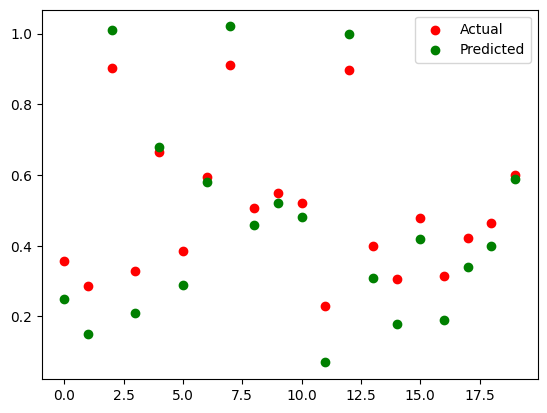

In [46]:
plt.scatter(range(20),results,c='r')
plt.scatter(range(20),y_test,c='g')
plt.legend(['Actual','Predicted'])
plt.show()

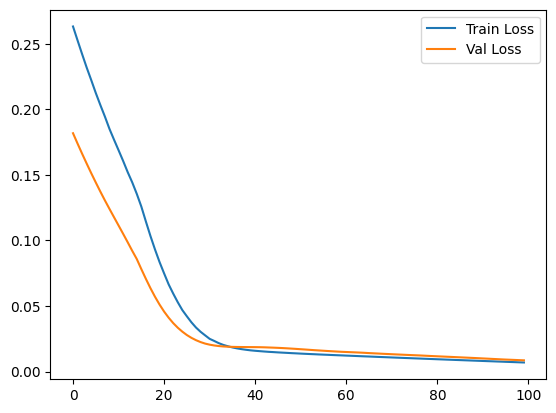

In [47]:
plt.plot(history.history['loss'], label= 'Train Loss')
plt.plot(history.history['val_loss'], label= 'Val Loss')
plt.legend()
plt.show()